# Identifying Nanoparticles Aggregate from Its Scattering Spectra with Machine Learning

In [ ]:
from pandas import read_excel
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import os

In [42]:
# Load dataset
url = "../../data/processed/den/tanpabola3.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

print(dataset.head(5))

   lam_max1      csc_max1  lam_min       csc_min  lam_fwhm1         c_mid  \
0       408  2.774638e-14      434  2.264798e-14        464  4.239645e-14   
1       410  2.984472e-14      432  2.725996e-14        464  4.555423e-14   
2       362  2.400898e-14      390  1.436011e-14        442  4.153600e-14   
3       364  2.971955e-14      392  1.702803e-14        412  4.696978e-14   
4       366  3.552294e-14      392  1.962838e-14        412  5.500586e-14   

   lam_max2      csc_max2  lam_fwhm2  fwhm  ...  posisi2  posisi3  posisi4  \
0       474  6.214492e-14        484    20  ...        0        0        0   
1       474  6.384849e-14        484    20  ...        0        0        0   
2       472  6.871189e-14        488    46  ...        0        0        0   
3       470  7.691152e-14        488    76  ...        0        0        0   
4       462  9.038334e-14        488    76  ...        0        0        0   

   posisi5  arah_k  arah_E  sb_putar  sudut1  sudut2  ket  
0       

In [43]:
# Define input and output data
X = dataset.iloc[:,0:10].values
y = dataset.iloc[:,20].values

## 0. Selecting Classification Model

In [27]:
# Spot check algorithms
models = {
    'LR' : make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', multi_class='ovr')),
    'LDA' : LinearDiscriminantAnalysis(),
    'KNN' : KNeighborsClassifier(),
    'CART' : DecisionTreeClassifier(),
    'NB' : GaussianNB(),
    'SVM' : SVC(gamma='auto')
}

In [ ]:
# Spot check algorithms
models = {
    'LR' : make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', multi_class='ovr')),
    'LDA' : LinearDiscriminantAnalysis(),
    'KNN' : KNeighborsClassifier(),
    'CART' : DecisionTreeClassifier(),
    'NB' : GaussianNB(),
    'SVM' : make_pipeline(StandardScaler(), SVC(gamma='auto'))
}

In [44]:
#Cross-validation
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

# Evaluation storage
results = {name: {'accuracy': [], 'precision': []} for name in models}

# Training and evaluation
for name, model in models.items():
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average=None)

        results[name]['accuracy'].append(acc)
        results[name]['precision'].append(prec)

# Print results
for name, scores in results.items():
    print(f"Model: {name}")
    print(f"  Mean Accuracy: {np.mean(scores['accuracy']):.4f}")
    print(f"  Mean Precision: {np.mean(scores['precision']):.4f}")
    print()


Model: LR
  Mean Accuracy: 0.7881
  Mean Precision: 0.7846

Model: LDA
  Mean Accuracy: 0.7199
  Mean Precision: 0.7213

Model: KNN
  Mean Accuracy: 0.8870
  Mean Precision: 0.8914

Model: CART
  Mean Accuracy: 0.9141
  Mean Precision: 0.9236

Model: NB
  Mean Accuracy: 0.5807
  Mean Precision: 0.5738

Model: SVM
  Mean Accuracy: 0.9169
  Mean Precision: 0.9357



## 1. Validation for `tanpabola3.xlsx` Data

In [45]:
# Load dataset
url = "../../data/processed/den/tanpabola3.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=1,
    random_state=1
)

print(len(y_train))
print(len(y_valid))
print(len(y_valid)/(len(y_train) + len(y_valid)))

1070
1
0.0009337068160597573


In [ ]:
# Write results to a text file
with open("output_validation_tanpabola3.txt", "w") as f:
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_predict = model.predict(X_valid)
        report = classification_report(y_valid, y_predict)
        cf = confusion_matrix(y_valid, y_predict)

        f.write(f"Model: {name}\n")
        f.write(f"confusion matrix:\n {cf}\n")
        f.write(f"classification report: \n {report}\n")
        f.write(f"=====================================================\n")
print("Evaluation results exported to .txt file") 


### - Testing with Data `3bola.xlsx`

In [47]:
# Load dataset
url = "../../data/processed/den/3bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
bola3 = read_excel(url, names=names, header=None)

# Define input and output data
X_bola3 = bola3.iloc[:,0:10].values
y_bola3 = bola3.iloc[:,20].values

print(len(X_bola3))

630


In [ ]:
y_valid = y_bola3
X_valid = X_bola3
# Write results to a text file
with open("output_validation_bola3_100.txt", "w") as f:
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_predict = model.predict(X_valid)
        report = classification_report(y_valid, y_predict)
        cf = confusion_matrix(y_valid, y_predict)

        f.write(f"Model: {name}\n")
        f.write(f"confusion matrix:\n {cf}\n")
        f.write(f"classification report: \n {report}\n")
        f.write(f"=====================================================\n")
print("Evaluation results exported to .txt file")  

### - Testing with 20 data `bola3.xlsx` on each group 

In [ ]:
y_valid = y_bola3
X_valid = X_bola3
# Write results to a text file
with open("output_validation_bola3_20-50.txt", "w") as f:
    for i in range(int(np.round(len(y_bola3)/50))):
        row = i*50
        itv = 20 + (i*50)
        X_valid = X_bola3[row:itv,:] 
        y_valid = y_bola3[row:itv]

        f.write(f"=========================( {i+1} )==========================\n")
        for name, model in models.items():
            model.fit(X_train,y_train)
            y_predict = model.predict(X_valid)
            report = classification_report(y_valid, y_predict, output_dict=True)
            cf = confusion_matrix(y_valid, y_predict)

            filtered_report = {k:v for k, v in report.items() if k not in ('accuracy','macro avg', 'weighted avg', 'micro avg')}
            df = pd.DataFrame(filtered_report).T
            acc = report['accuracy']
            f.write(f"Model: {name}\n")
            f.write(f"confusion matrix:\n {cf}\n")
            f.write(f"classification report: \n accuracy = {acc}\n {df[['precision', 'recall', 'f1-score']]}\n")
            f.write(f"------------------------------------------------------------\n")
print("Evaluation results exported to .txt file")

In [58]:
X_bola3_5070 = X_bola3[50:70,:]
y_bola3_5070 = y_bola3[50:70]

In [61]:
model1 = models['SVM'].fit(X_train,y_train)
model2 = models['CART'].fit(X_train,y_train)
y_predict1 = model1.predict(X_bola3_5070)
y_predict2 = model2.predict(X_bola3_5070)

In [62]:
print('Model: SVM')
print(f'actuals: {y_bola3_5070}')
print(f'predict: {y_predict1}')
print("================")
print('Model: CART')
print(f'actuals: {y_bola3_5070}')
print(f'predict: {y_predict2}')


Model: SVM
actuals: [2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1]
predict: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Model: CART
actuals: [2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1]
predict: [2 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2]


In [96]:
columns = ['posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
#bola3[columns][70-7:70]
bola3[columns][50:64]

,posisi1,posisi2,posisi3,posisi4,posisi5,arah_k,arah_E,sb_putar,sudut1,sudut2,ket
50,0,0,1,1,1,3,2,2,1,5,2
51,0,0,1,1,1,3,2,2,3,0,2
52,0,0,1,1,1,3,2,2,4,5,2
53,0,0,1,1,1,3,2,2,6,0,2
54,0,0,1,1,1,3,2,2,7,5,2
55,0,0,1,1,1,3,2,2,9,0,2
56,0,0,1,1,1,3,2,3,0,0,2
57,0,0,1,1,1,3,2,3,1,5,2
58,0,0,1,1,1,3,2,3,3,0,2
59,0,0,1,1,1,3,2,3,4,5,2


In [ ]:
X_bola3_300320 = X_bola3[300:320,:]
y_bola3_300320 = y_bola3[300:320]

y_predict3 = model1.predict(X_bola3_300320)
y_predict4 = model2.predict(X_bola3_300320)

In [52]:
print('Model: SVM')
print(f'actuals: {y_bola3_300320}')
print(f'predict: {y_predict3}')
print("================")
print('Model: CART')
print(f'actuals: {y_bola3_300320}')
print(f'predict: {y_predict4}')

Model: SVM
actuals: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
predict: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Model: CART
actuals: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
predict: [2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 1 0 0 0 0 0]


In [105]:
columns = ['posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
#bola3[columns][320-5:320]
bola3[columns][300:308]

,posisi1,posisi2,posisi3,posisi4,posisi5,arah_k,arah_E,sb_putar,sudut1,sudut2,ket
300,1,0,0,1,1,3,2,1,9,0,1
301,1,0,0,1,1,3,2,2,0,0,1
302,1,0,0,1,1,3,2,2,1,5,1
303,1,0,0,1,1,3,2,2,3,0,1
304,1,0,0,1,1,3,2,2,4,5,1
305,1,0,0,1,1,3,2,2,6,0,1
306,1,0,0,1,1,3,2,2,7,5,1
307,1,0,0,1,1,3,2,2,9,0,1


In [74]:
import os

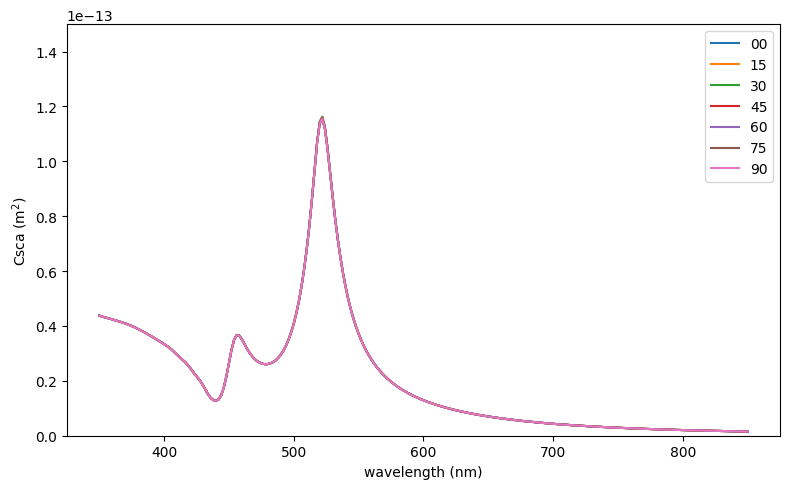

In [ ]:
folder_path = "../../data/raw/3"

#select the files you want to plot
selected_files = ['10011_Y4_00.xlsx', '10011_Y4_15.xlsx', '10011_Y4_30.xlsx', '10011_Y4_45.xlsx',
                  '10011_Y4_60.xlsx', '10011_Y4_75.xlsx', '10011_Y4_90.xlsx']


lam = np.arange(350,851,2)

plt.figure(figsize=(8,5))

for file in selected_files:
    file_path = os.path.join(folder_path,file)

    df = read_excel(file_path, header=None)

    csca = df.iloc[0]

    if len(csca) != len(lam):
        print(f"Warning: {file} has {len(csca)} values but x has {len(lam)} points")
        continue
    
    plt.plot(lam, csca, label=file[-7:-5])

plt.xlabel('wavelength (nm)')
plt.ylim([0,1.5E-13])
plt.ylabel('Csca (m$^2$)')
plt.legend()
plt.tight_layout()
plt.show()
    

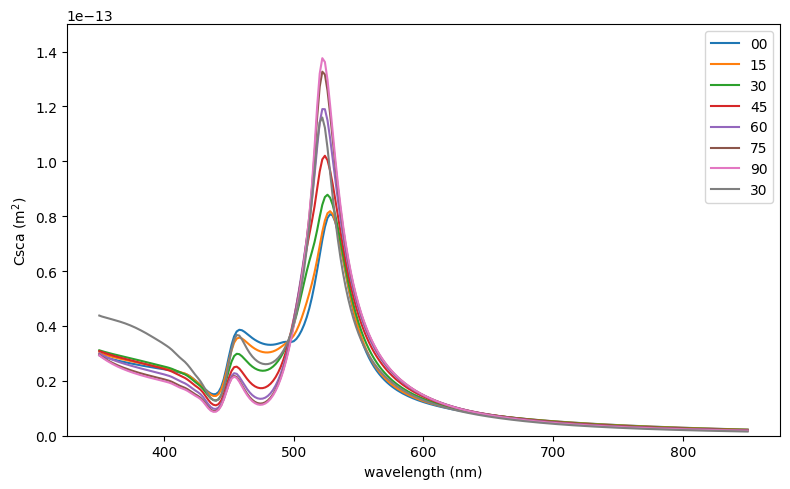

In [102]:
folder_path = "../../data/raw/3"

#select the files you want to plot
selected_files = ['00111_Y4_00.xlsx', '00111_Y4_15.xlsx', '00111_Y4_30.xlsx',
                  '00111_Y4_45.xlsx', '00111_Y4_60.xlsx', '00111_Y4_75.xlsx', '00111_Y4_90.xlsx',
                  '01011_X1_30.xlsx']


lam = np.arange(350,851,2)

plt.figure(figsize=(8,5))

for file in selected_files:
    file_path = os.path.join(folder_path,file)

    df = read_excel(file_path, header=None)

    csca = df.iloc[0]

    if len(csca) != len(lam):
        print(f"Warning: {file} has {len(csca)} values but x has {len(lam)} points")
        continue
    
    plt.plot(lam, csca, label=file[-7:-5])

plt.xlabel('wavelength (nm)')
plt.ylim([0,1.5E-13])
plt.ylabel('Csca (m$^2$)')
plt.legend()
plt.tight_layout()
plt.show()
    

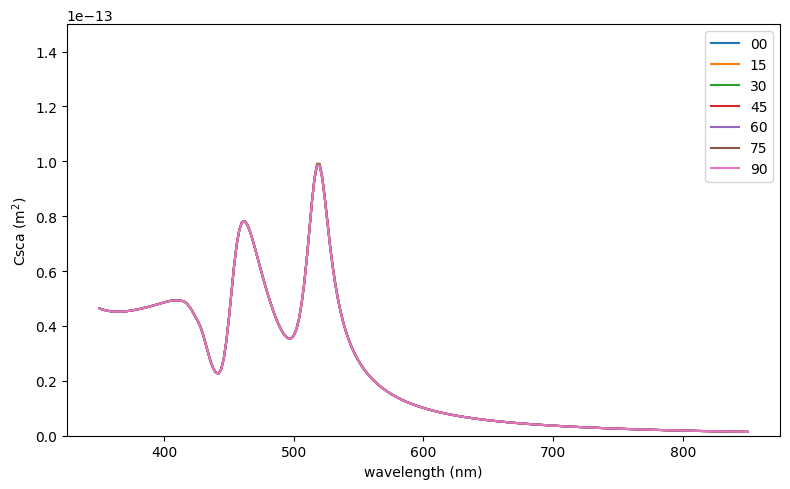

In [107]:
folder_path = "../../data/raw/3"

#select the files you want to plot
selected_files = ['10101_X1_00.xlsx', '10101_X1_15.xlsx', '10101_X1_30.xlsx',
                  '10101_X1_45.xlsx', '10101_X1_60.xlsx', '10101_X1_75.xlsx', '10101_X1_90.xlsx']


lam = np.arange(350,851,2)

plt.figure(figsize=(8,5))

for file in selected_files:
    file_path = os.path.join(folder_path,file)

    df = read_excel(file_path, header=None)

    csca = df.iloc[0]

    if len(csca) != len(lam):
        print(f"Warning: {file} has {len(csca)} values but x has {len(lam)} points")
        continue
    
    plt.plot(lam, csca, label=file[-7:-5])

plt.xlabel('wavelength (nm)')
plt.ylim([0,1.5E-13])
plt.ylabel('Csca (m$^2$)')
plt.legend()
plt.tight_layout()
plt.show()
    

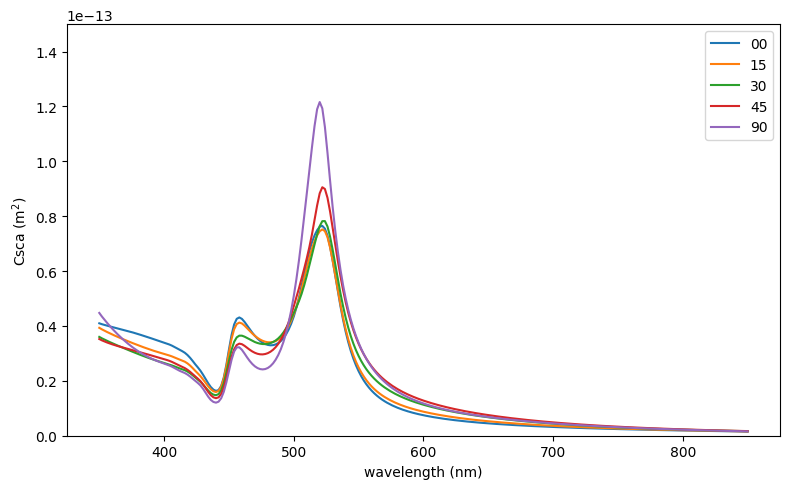

In [108]:
folder_path = "../../data/raw/3"

#select the files you want to plot
selected_files = ['10011_Y4_00.xlsx', '10011_Y4_15.xlsx', '10011_Y4_30.xlsx',
                  '10011_Y4_45.xlsx', '10011_Y4_90.xlsx']


lam = np.arange(350,851,2)

plt.figure(figsize=(8,5))

for file in selected_files:
    file_path = os.path.join(folder_path,file)

    df = read_excel(file_path, header=None)

    csca = df.iloc[0]

    if len(csca) != len(lam):
        print(f"Warning: {file} has {len(csca)} values but x has {len(lam)} points")
        continue
    
    plt.plot(lam, csca, label=file[-7:-5])

plt.xlabel('wavelength (nm)')
plt.ylim([0,1.5E-13])
plt.ylabel('Csca (m$^2$)')
plt.legend()
plt.tight_layout()
plt.show()
    

## 2. Validation for `bola12345.xlsx` Data

In [ ]:
# Load dataset
url = "../../data/processed/den/bola12345.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

# Define input and output data
X = dataset.iloc[:,0:10].values
y = dataset.iloc[:,20].values

In [ ]:
import seaborn as sns

In [ ]:
sns.displot(dataset, x='lam_min', hue='ket', kind='kde')

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.5,
    random_state=2
)

print(len(y_train))
print(len(y_valid))
print(len(y_valid)/(len(y_train) + len(y_valid)))

In [ ]:
# Write results to a text file
with open("output_validation_bola12345.txt", "w") as f:
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_predict = model.predict(X_valid)
        report = classification_report(y_valid, y_predict)
        cf = confusion_matrix(y_valid, y_predict)

        f.write(f"Model: {name}\n")
        f.write(f"confusion matrix:\n {cf}\n")
        f.write(f"classification report: \n {report}\n")
        f.write(f"=====================================================\n")
print("Evaluation results exported to .txt file")

## 3. Using `2bola.xlsx` for Train Model to Predict Experiment Data

In [2]:
# Load dataset
url = "../../data/processed/den/2bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
dataset = read_excel(url, names=names, header=None)

# Define input and output data
X = dataset.iloc[:,0:10].values
y = dataset.iloc[:,20].values

In [4]:
#test_size=1

X_train = X
y_train = y

In [5]:
# Load dataset
url = "../../data/processed/den/Exp_2bola.xlsx"
names = ['lam_max1', 'csc_max1', 'lam_min', 'csc_min','lam_fwhm1','c_mid','lam_max2','csc_max2','lam_fwhm2','fwhm','posisi1','posisi2','posisi3','posisi4','posisi5','arah_k','arah_E','sb_putar','sudut1','sudut2','ket'] 
exp = read_excel(url, names=names, header=None)

# Define input and output data
X_exp = exp.iloc[:,0:10].values
y_exp = exp.iloc[:,20].values

In [7]:
y_valid = y_exp
X_valid = X_exp
# Write results to a text file
with open("output_validation_experiment_1.txt", "w") as f:
    for name, model in models.items():
        model.fit(X_train,y_train)
        y_predict = model.predict(X_valid)
        report = classification_report(y_valid, y_predict)
        cf = confusion_matrix(y_valid, y_predict)

        f.write(f"Model: {name}\n")
        f.write(f"confusion matrix:\n {cf}\n")
        f.write(f"classification report: \n {report}\n")
        f.write(f"=====================================================\n")
print("Evaluation results exported to .txt file")

d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\1. Project\Python\mlvenv\Lib

Evaluation results exported to .txt file
